<a href="https://www.kaggle.com/code/manoj12jha/imdb-dataset-nlp?scriptVersionId=158810206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

----------
**IMDB Movie review dataset - Sentiment Analysis**
=====================================

***Manoj Jha

*Jan 2024*

----------

- <a href='#1'>1. Load libraries and read the data</a>  
    - <a href='#1.1'>1.1. Load libraries</a>
    - <a href='#1.2'>1.2. Download the dataset and create dataframe as IMDB</a>
    - <a href='#1.3'>1.3. Check Info</a>
    - <a href='#1.4'>1.4. Check describe</a>

- <a href='#2'>2. Preprocessing steps</a>
    - <a href='#2.1'>2.1. Removing punctuation, number and special characters</a>
    - <a href='#2.2'>2.2. Remove stop words in dataset</a>

- <a href='#3'>3. Normalize review</a>
    - <a href='#3.1'>3.1. Using Stemming on Review dataset</a>
   
- <a href='#4'>4. Preprocessed review</a>
    - <a href='#4.1'>4.1. Included in the IMDB_df as Cleaned_review and create Wordcloud</a>

- <a href='#5'>5. Perform N-gram Analysis on cleaned_ review</a>
    - <a href='#5.1'>5.1.  20 - most frequently occurring Bigrams</a>   
    - <a href='#5.2'>5.2.  20 - most frequently occurring Trigrams</a>

- <a href='#6'>6. Create train and test set</a>
    - <a href='#6.1'>6.1.  Perform label encoding technique</a>   
    - <a href='#6.2'>6.2.  Create TFIDF object and split the data</a>
      - <a href='#6.2.1'>6.2.1.  Train Support Vector machine model</a>
      - <a href='#6.2.2'>6.2.2.  Display the confusion matrix</a>
    - <a href='#6.3'>6.3.  Create BoW object and split the data</a>
      - <a href='#6.3.1'>6.3.1.  Train Support Vector machine model</a>
      - <a href='#6.3.2'>6.3.2.  Display the confusion matrix</a>
    - <a href='#6.2'>6.2.  Compare TFIDF and BoW Model</a>

- <a href='#7'>7. HMM POS tagging on the first 2 rows</a>
    
- <a href='#8'>8. LDA algorithm create the Topics (Min 10) for the Corpus</a>

- <a href='#9'>9. Compute the coherence score</a>  

- <a href='#10'>10. Visualize the topics</a>

- <a href='#11'>11. Implement the dependency parser</a>

## <a id='1.1'>1.1. Load libraries</a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import LatentDirichletAllocation

from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


## <a id='1.2'>1.2. Download the dataset and create dataframe as IMDB</a>


#### 1. Download the dataset and create a dataframe named as IMDB then check the head, info, and
describe methods on created dataframe

In [2]:

IMDB_df = pd.read_csv('https://raw.githubusercontent.com/manojjha/BITS_Assignments/main/NLP/IMDB%20Dataset.csv?token=GHSAT0AAAAAACJXQMXDNSKYL6LUDAUK5SISZMICSXQ')
IMDB_df.head()



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## <a id='1.3'>1.3. Check Info</a>

In [3]:
IMDB_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## <a id='1.4'>1.4. Check describe</a>



In [4]:
IMDB_df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
IMDB_df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## <a id='2'>2. Preprocessing steps</a>


In [6]:
import nltk
nltk.download('stopwords')
tokenizer = ToktokTokenizer()

stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## <a id='2.1'>2.1. Removing punctuation, number and special characters</a>


In [7]:
#Removing noise text

def strip_html(text):
  soup = BeautifulSoup(text, 'html.parser')
  return soup.get_text()

def remove_between_square_brackets(text):
  return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
  text = strip_html(text)
  text = remove_between_square_brackets(text)
  return text

IMDB_df['review'] = IMDB_df['review'].apply(denoise_text)

/tmp/ipykernel_19/3752247428.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [8]:
#remove special characters

def remove_special_characters(text, remove_digits=True):
  pattern = r'[^a-zA-Z0-9\s]'
  text = re.sub(pattern,'', text)
  return text

IMDB_df['review'] = IMDB_df['review'].apply(remove_special_characters)

In [9]:
IMDB_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


## <a id='2.2'>2.2. Remove stop words in dataset</a>


In [10]:
# Removing stopwords

stop = set(stopwords.words('english'))
print(stop)

{'your', "isn't", 'most', "mustn't", 'their', 'his', 'both', 'any', 'not', 'she', 'off', 'o', 'an', 't', 're', 'the', 'yourselves', "wasn't", 'itself', 'hadn', 'which', 'when', 'her', 'does', "didn't", "mightn't", 'aren', 'as', "it's", 'its', 'don', "hasn't", 'each', 'will', 'of', 'from', 'to', "won't", 'myself', 'y', 'he', 'again', "weren't", 'above', 'yourself', 's', 'have', 'until', 'where', 'how', 'am', 'is', "you'll", 'can', 'me', 'more', 'no', 've', 'wouldn', "haven't", "she's", 'd', "should've", 'weren', "don't", 'so', 'in', 'now', 'after', 'under', 'these', 'through', 'there', 'ain', 'them', 'with', 'll', 'down', 'himself', 'has', "wouldn't", 'only', 'those', "you've", 'own', 'him', 'ours', 'some', 'mustn', 'won', 'wasn', 'between', 'by', 'once', 'here', 'having', 'very', 'hers', 'are', 'mightn', 'isn', 'hasn', 'i', 'was', 'be', 'for', 'do', 'just', "you're", 'and', 'or', 'whom', 'at', 'my', 'this', 'did', 'below', 'herself', 'yours', "couldn't", 'shouldn', 'because', 'm', 'dur

In [11]:
def remove_stopwords(text, is_lower_case = False):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  if is_lower_case:
    filtered_tokens = [token for token in tokens if token not in stopword_list ]

  else:
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list ]

  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

IMDB_df['review'] = IMDB_df['review'].apply(remove_stopwords)

In [12]:
IMDB_df.head()

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,Basically theres family little boy Jake thinks...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


## <a id='3'>3. Normalize review</a>


## <a id='3.1'>3.1. Using Stemming on Review dataset</a>


In [13]:
# text stemming

def simple_stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = ' '.join([ps.stem(word) for word in text.split()])
  return text

IMDB_df['review'] = IMDB_df['review'].apply(simple_stemmer)

In [14]:
IMDB_df.head()

,review,sentiment
0,one review mention watch 1 Oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


## <a id='4'>4. Preprocessed review</a>
## <a id='4.1'>4.1. Included in the IMDB_df as Cleaned_review and create Wordcloud</a>



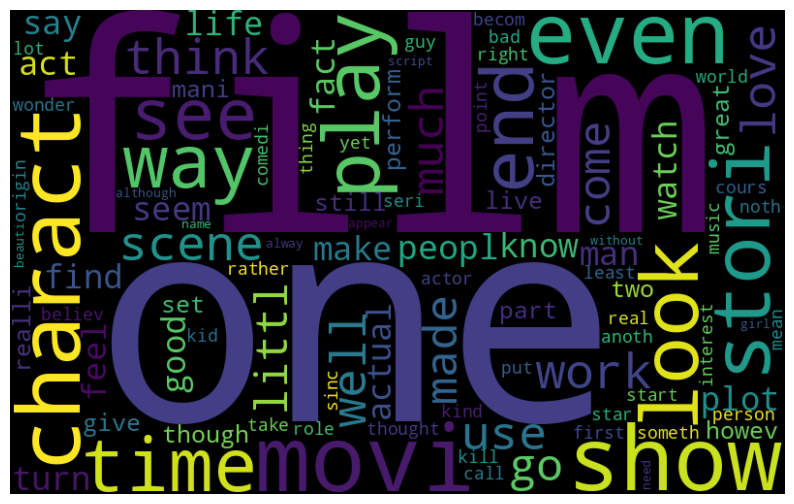

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
IMDB_df['cleaned_review'] = IMDB_df['review']
IMDB_df.head()


wc = WordCloud(width=800, height=500, random_state=21, max_words=100, min_font_size=10).generate(' '.join(IMDB_df['cleaned_review']))
plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


## <a id='5'>5. Perform N-gram Analysis on cleaned_ review</a>

## <a id='5.1'>5.1. 20 - most frequently occurring Bigrams</a>



In [16]:
from nltk.util import ngrams
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from collections import Counter

def generate_ngrams(text, n):
    n_grams = ngrams(text.split(), n)
    return [' '.join(grams) for grams in n_grams]


cleaned_review = IMDB_df['review']
all_text = ' '.join(cleaned_review)

bigrams = generate_ngrams(all_text, 2)
trigrams = generate_ngrams(all_text, 3)

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# 20 most common bigrams and trigrams
top_bigrams = bigram_counts.most_common(20)
top_trigrams = trigram_counts.most_common(20)


def plot_ngrams(top_ngrams, n):
    labels, values = zip(*top_ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.title(f'Top {n} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.show()



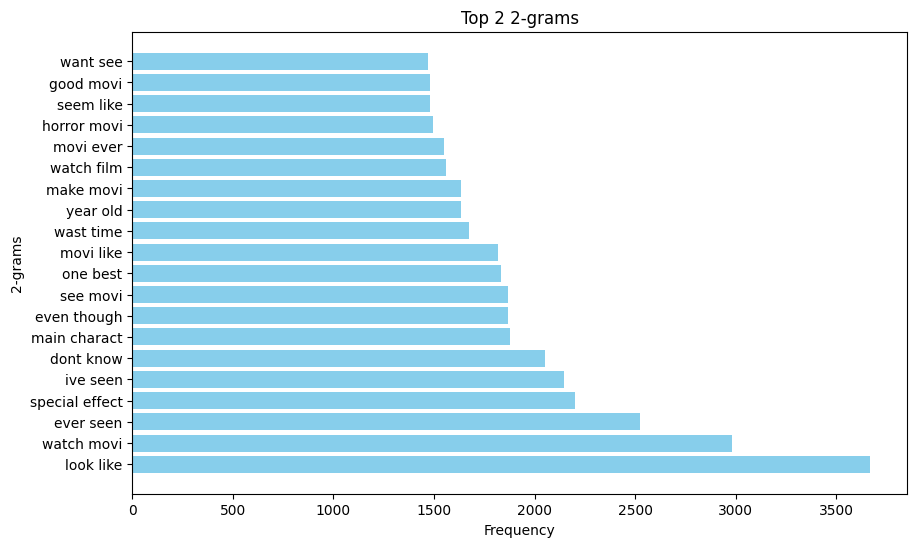

In [18]:
plot_ngrams(top_bigrams, 2)


## <a id='5.2'>5.2. 20 - most frequently occurring Trigrams</a>

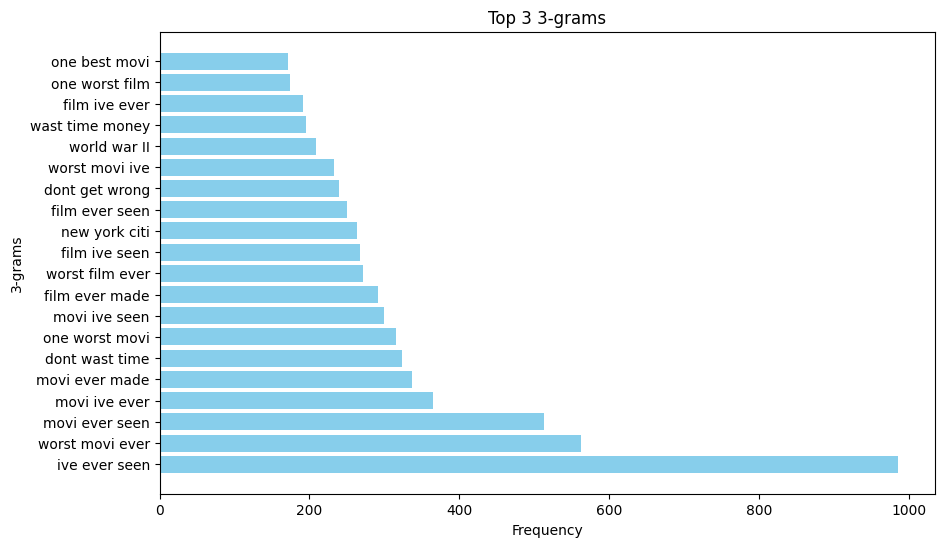

In [19]:
plot_ngrams(top_trigrams, 3)

In [20]:
IMDB_df.head()

,review,sentiment,cleaned_review
0,one review mention watch 1 Oz episod youll hoo...,positive,one review mention watch 1 Oz episod youll hoo...
1,wonder littl product film techniqu unassum old...,positive,wonder littl product film techniqu unassum old...
2,thought wonder way spend time hot summer weeke...,positive,thought wonder way spend time hot summer weeke...
3,basic there famili littl boy jake think there ...,negative,basic there famili littl boy jake think there ...
4,petter mattei love time money visual stun film...,positive,petter mattei love time money visual stun film...


In [21]:
IMDB_df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

6. Create two objects X and y. X will be the 'cleaned_ review' column of IMDB data frame
and y will be the 'Sentiment' column. ( 3 Marks)
- a. Perform label encoding technique for sentiment column
- b. Create a TFIDF object and split the data into training and testing sets. Train a Support
Vector machine model and Display the confusion Matrix.
- c. Create a BoW object and split the data into training and testing sets. Train a Support
Vector machine model and Display the confusion Matrix.
- d. Compare TFIDF and BoW.

## <a id='6'>6. Create train and test set</a>



In [22]:
#  Create X and y objects
X = IMDB_df['cleaned_review']
y = IMDB_df['sentiment']

### <a id='6.1'>6.1.  Perform label encoding technique</a>


In [23]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

In [24]:
print(y_encoded)

[1 1 1 ... 0 0 0]



### <a id='6.2'>6.2.  Create TFIDF object and split the data</a>


In [25]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)


#### <a id='6.2.1'>6.2.1.  Train Support Vector machine model</a>


In [26]:
# Initialize and train the SVM model
svm_tfidf = SVC(kernel='linear', random_state=42)
svm_tfidf.fit(X_train_tfidf, y_train_tfidf)

y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)




#### <a id='6.2.2'>6.2.2.  Display the confusion matrix</a>


In [27]:
conf_matrix_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
print("Confusion Matrix (TFIDF):")
print(conf_matrix_tfidf)


Confusion Matrix (TFIDF):
[[4312  649]
 [ 509 4530]]


In [28]:
accuracy = svm_tfidf.score(X_train_tfidf, y_train_tfidf)
print("Training accuracy:", accuracy * 100, "%")


Training accuracy: 91.9625 %


In [29]:

new_text = "This movie is best!"


cleaned_text = simple_stemmer(new_text)

new_text_tfidf = tfidf_vectorizer.transform([cleaned_text])


prediction = svm_tfidf.predict(new_text_tfidf)

predicted_sentiment = label_encoder.inverse_transform(prediction)[0]

print(f"Original Text: {new_text}")
print(f"Cleaned Text: {cleaned_text}")
print(f"Predicted Sentiment: {predicted_sentiment}")


Original Text: This movie is best!
Cleaned Text: thi movi is best!
Predicted Sentiment: positive


### <a id='6.3'>6.3.   Create BoW object and split the data</a>


In [30]:
print(y_encoded)

[1 1 1 ... 0 0 0]


In [31]:
# BoW object
bow_vectorizer = CountVectorizer(max_features=2500)

X_bow = bow_vectorizer.fit_transform(X)


In [32]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, y_encoded, test_size=0.2, random_state=0)

In [33]:
X_train_bow.shape

(40000, 2500)

In [34]:
y_train_bow.shape

(40000,)


#### <a id='6.3.1'>6.3.1.  Train Support Vector machine model</a>


In [35]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_bow,y_train_bow)

In [36]:
y_pred_bow = model1.predict(X_test_bow)


### <a id='6.3.2'>6.3.2.  Display the confusion matrix</a>


In [37]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test_bow, y_pred_bow))
print(classification_report(y_pred_bow,y_test_bow))

0.8351
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      5080
           1       0.83      0.84      0.83      4920

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [38]:
# Display the confusion matrix
conf_matrix_bow = confusion_matrix(y_test_bow, y_pred_bow)
print("\nConfusion Matrix (BoW):")
print(conf_matrix_bow)


Confusion Matrix (BoW):
[[4233  802]
 [ 847 4118]]



## <a id='6.4'>6.4. Compare TFIDF and BoW Model</a>

In [39]:
# Compare confusion matrices
print("\nComparison:")
print("TFIDF Confusion Matrix:")
print(conf_matrix_tfidf)
print("\nBoW Confusion Matrix:")
print(conf_matrix_bow)




Comparison:
TFIDF Confusion Matrix:
[[4312  649]
 [ 509 4530]]

BoW Confusion Matrix:
[[4233  802]
 [ 847 4118]]


Comparison:
- Accuracy: TF-IDF outperforms BoW in accuracy, indicating that TF-IDF is better at correctly classifying both positive and negative instances.
- Precision: TF-IDF has a slightly higher precision, suggesting it is better at correctly identifying positive instances among its predictions.
- Recall: TF-IDF has a higher recall, indicating that it is better at capturing positive instances among all actual positive instances.
- F1 Score: TF-IDF has a higher F1 score, which is a balance between precision and recall.

## <a id='7'>7. HMM POS tagging on the first 2 rows</a>


In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
'''import pandas as pd
from nltk import word_tokenize, pos_tag, hmm
from nltk.tag import hmm

text_sample = IMDB_df['cleaned_review'].head(2)
print(text_sample)

tagger = hmm.HiddenMarkovModelTrainer().train([pos_tag(word_tokenize(text)) for text in text_sample])

for i, text in enumerate(text_sample):
    tokens = word_tokenize(text)
    tagged_text = tagger.tag(tokens)
    print(f"\nPOS Tagging for Row {i + 1}:")
    print(tagged_text)

'''

'import pandas as pd\nfrom nltk import word_tokenize, pos_tag, hmm\nfrom nltk.tag import hmm\n\ntext_sample = IMDB_df[\'cleaned_review\'].head(2)\nprint(text_sample)\n\ntagger = hmm.HiddenMarkovModelTrainer().train([pos_tag(word_tokenize(text)) for text in text_sample])\n\nfor i, text in enumerate(text_sample):\n    tokens = word_tokenize(text)\n    tagged_text = tagger.tag(tokens)\n    print(f"\nPOS Tagging for Row {i + 1}:")\n    print(tagged_text)\n\n'

## <a id='8'>8. LDA algorithm create the Topics (Min 10) for the Corpus</a>


In [42]:
vectorizer = CountVectorizer(max_features=5000)
X_bow = vectorizer.fit_transform(IMDB_df['cleaned_review'])

lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
X_lda = lda_model.fit_transform(X_bow)

feature_names = vectorizer.get_feature_names_out()
n_top_words = 10

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)



Topic #1:
['love', 'movi', 'get', 'girl', 'one', 'play', 'like', 'famili', 'life', 'young']

Topic #2:
['film', 'movi', 'one', 'great', 'like', 'good', 'watch', 'see', 'realli', 'time']

Topic #3:
['movi', 'charact', 'stori', 'good', 'like', 'would', 'book', 'one', 'plot', 'act']

Topic #4:
['film', 'horror', 'one', 'scene', 'get', 'kill', 'like', 'look', 'make', 'end']

Topic #5:
['film', 'peopl', 'one', 'movi', 'life', 'like', 'stori', 'make', 'see', 'way']

Topic #6:
['movi', 'like', 'watch', 'bad', 'one', 'film', 'dont', 'even', 'see', 'make']

Topic #7:
['film', 'war', 'one', 'year', 'time', 'stori', 'american', 'would', 'see', 'well']

Topic #8:
['film', 'one', 'perform', 'play', 'role', 'stori', 'charact', 'best', 'scene', 'actor']

Topic #9:
['show', 'get', 'one', 'like', 'episod', 'seri', 'guy', 'tv', 'time', 'take']

Topic #10:
['one', 'game', 'like', 'seri', 'anim', 'time', 'episod', 'first', 'show', 'music']


In [43]:
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
X_lda = lda_model.fit_transform(X_tfidf)

In [44]:
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)


Topic #1:
['film', 'movi', 'play', 'get', 'one', 'murder', 'good', 'kill', 'wife', 'man']

Topic #2:
['film', 'movi', 'one', 'like', 'action', 'charact', 'scene', 'good', 'get', 'even']

Topic #3:
['movi', 'film', 'good', 'charact', 'stori', 'great', 'one', 'realli', 'like', 'watch']

Topic #4:
['horror', 'gore', 'movi', 'slasher', 'film', 'creepi', 'fulci', 'vampir', 'zombi', 'one']

Topic #5:
['garbo', 'bam', 'christi', 'leland', 'meg', 'ryan', 'polanski', 'tenant', 'dunn', 'robbin']

Topic #6:
['movi', 'film', 'like', 'bad', 'watch', 'one', 'get', 'even', 'good', 'realli']

Topic #7:
['danc', 'movi', 'love', 'disney', 'eddi', 'song', 'murphi', 'music', 'kelli', 'cinderella']

Topic #8:
['film', 'movi', 'one', 'stori', 'charact', 'like', 'time', 'love', 'see', 'play']

Topic #9:
['show', 'tarzan', 'cartoon', 'brosnan', 'song', 'great', 'elvi', 'madonna', 'movi', 'episod']

Topic #10:
['episod', 'seri', 'game', 'season', 'show', 'space', 'trek', 'planet', 'scifi', 'alien']


In [45]:
X_bow.shape

(50000, 5000)

In [46]:
X_train_bow.shape

(40000, 2500)

## <a id='9'>9. Compute the coherence score</a>


## <a id='10'>10. Visualize the topics</a>


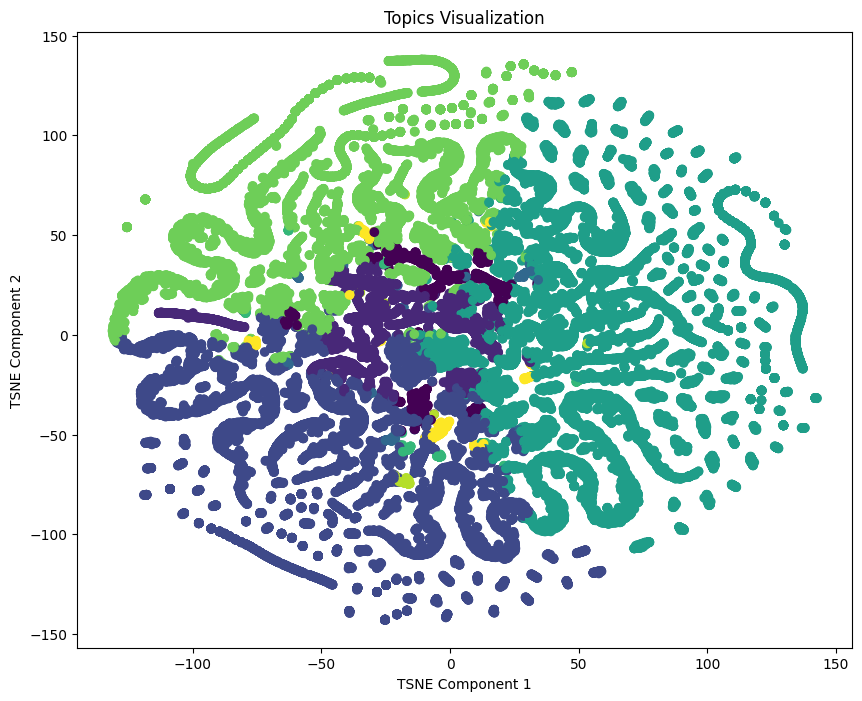

In [47]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize_topics(lda_model, vectorizer, data):
    topics = lda_model.transform(data)
    tsne = TSNE(n_components=2, random_state=42)
    topics_tsne = tsne.fit_transform(topics)

    plt.figure(figsize=(10, 8))
    plt.scatter(topics_tsne[:, 0], topics_tsne[:, 1], marker='o', c=np.argmax(topics, axis=1), cmap='viridis')
    plt.title('Topics Visualization')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

visualize_topics(lda_model, bow_vectorizer, X_bow)


## <a id='11'>11. Implement the dependency parser</a>


In [48]:
import spacy

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Select two random sentences with at least 10 words
random_sentences = IMDB_df[IMDB_df['cleaned_review'].apply(lambda x: len(x.split()) >= 10)].sample(2)['cleaned_review'].tolist()

# Print the random sentences
for i, sentence in enumerate(random_sentences, start=1):
    print(f"\nRandom Sentence #{i}:")
    print(sentence)

    # Apply dependency parser
    doc = nlp(sentence)

    # Visualize the dependency parse
    spacy.displacy.render(doc, style='dep', options={'compact': True, 'distance': 100})



Random Sentence #1:
pile sht tie book worst thing ever made cant believ someon actual relas crap let alon acual made horribl horribl horribl even worth mention damn stori detail that bad actual avoid like sar



Random Sentence #2:
sad find film worth watch russian disgust noth film deserv prais except cinematographi howev one find beauti death pervers think film poorli design direct noth irrit even enrag shameless specul art call garbag art balabanov want shock viewer pervas evil succeed creat hopelessli dark film biggest shock balabanov primit directori work would never advis friend watch huge disappoint
